## Tanzania Water Wells

## Business understanding

##### Tanzania is an East African country with about 59,678,000 in population (2021 est.), and located just south of the Equator. It is a developing country that still has struggles with providing clean water to its entire population. There are many water points already established in the country, but some are in great need of repair while others have failed altogether.

##### An NGO focused on locating wells needing repair is looking to find patterns in non-functional wells to influence how new wells are built.

## Data understanding

This project analyzes the Tanzanian Water Wells datasets released by the Tanzanian Government. The dataset includes 59,400 rows each repressenting a unique well within the Tanzanian Governments realm. Our targets are broken down into three categories:

* `Functional `
* `Non Functional`
* `Functional Needs Repair`

We will attempt to predict the status of the wells condition through utilizing Exploratory Data Analysis (EDA) and building classification models tuned to the parameters that will have the largest impact on our predictive ability.

This dataset comes with two applicable files training_set_labels and training_set_values. During our EDA we will join these tables together to give us one file to work with. The values dataset has 39 total columns and contains all of our predicitve features. Below is a description of each column.

* `amount_tsh `: Total static head (amount water available to waterpoint)
* `date_recorded` : The date the row was entered
* `funder `: Who funded the well
* `gps_height` : Altitude of the well
* `installer` : Organization that installed the well
* `longitude` : GPS coordinate
* `latitude `: GPS coordinate
* `wpt_name `: Name of the waterpoint if there is one
* `num_private` :Private use or not
* `basin `: Geographic water basin
* `subvillage` : Geographic location
* `region `: Geographic location
* `region_code` : Geographic location (coded)
* `district_code` : Geographic location (coded)
* `lga` : Geographic location
* `ward` : Geographic location
* `population` : Population around the well
* `public_meeting` : True/False
* `recorded_by `: Group entering this row of data
* `scheme_management` : Who operates the waterpoint
* `scheme_name `: Who operates the waterpoint
* `permit `: If the waterpoint is permitted
* `construction_year` : Year the waterpoint was constructed
* `extraction_type `: The kind of extraction the waterpoint uses
* `extraction_type_group` : The kind of extraction the waterpoint uses
* `extraction_type_class` : The kind of extraction the waterpoint uses
* `management `: How the waterpoint is managed
* `management_group` : How the waterpoint is managed
* `payment `: What the water costs
* `payment_type` : What the water costs
* `water_quality` : The quality of the water
* `quality_group `: The quality of the water
* `quantity `: The quantity of water
* `quantity_group` : The quantity of water
* `source `: The source of the water
* `source_type` : The source of the water
* `source_class` : The source of the water
* `waterpoint_type` : The kind of waterpoint
* `waterpoint_type_group `: The kind of waterpoint
``

## Data preparation

### Data inspection

Import required libraries to be used in the data, merge the data together and proceed to check for null values and duplicates in the data

In [128]:
#Import required libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [129]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [130]:
#load the data
training_set = pd.read_csv("Data/training-set-values.csv")
training_label  = pd.read_csv("Data/training-set-labels.csv")
training_label
training_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [131]:
training_label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [132]:
#Merge the two dataframe together using the id column and name it df
df = pd.merge(training_set, training_label, on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [133]:
#check for nan values in df
pd.option_context('display.max_rows', None)
df.isna().sum()/len(df)*100 


id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

### Data cleaning

Check missing values for columns with missing values and handle each column 

In [134]:
#Display the columns with missing values
df[['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit']]

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


In [135]:
# first check for duplicated rows and drop them
df.duplicated().sum()

0

Since there are no duplicates in this data and there is no numeric data type to replace with measures of central tendency`(mean,mode and median)`, we handle the missing value by each row

To handle `scheme name`, it is explained to be the one who operates the waterpoint. It is described the same way as `scheme management`  therefore it is reasonable to drop one. In this case, we drop `scheme name` due to high missing values

In [136]:
#drop scheme name column
df.drop('scheme_name', axis=1, inplace=True)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Since most funding organisations end up being the `installers` of the waterfront, it is safe to place the `funders` name in place of `installer` and `installer` in place of `funders` name. In place of both being `Nan`, we can replace with `None`

In [137]:
#check null in both rows before filling
df[['funder','installer']].isna().sum()

funder       3635
installer    3655
dtype: int64

In [138]:
#filling null values in funder with data from installer
df['funder'].fillna(df['installer'], inplace=True)
#filling null values in installer with data from funder
df['installer'].fillna(df['funder'], inplace=True)
#Check for the change
df[['funder','installer']].isna().sum()

funder       3582
installer    3582
dtype: int64

In [139]:
#replace the rest with None
df['funder'].fillna('unknown', inplace=True)
df['installer'].fillna('unknown', inplace=True)

The null values in `subvillage` have less than 1% of the data. The null values are dropped.

In [140]:
#drop the null rows on subvillage column
df.dropna(subset=['subvillage'], inplace = True)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,unknown,0,unknown,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


With `public meeting` and `permit` columns we replace with `False` to assume that there was no public meetting and there was also no permit given.

In [141]:
# fill the null values with False 
df['public_meeting'].fillna(False, inplace=True)
df['permit'].fillna(False, inplace=True)

In [142]:
#
df['scheme_management'].value_counts()

VWC                 36437
WUG                  5206
Water authority      3147
WUA                  2883
Water Board          2747
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

According to the categories given in scheme management, there is a none category. Given we do not have any data on that column, we will place null values in none category


In [143]:
# fill the null values with False 
df['scheme_management'].fillna(False, inplace=True)

### Exploratory Data Analysis(EDA)

#### Handling grouped data

In this dataset, there are grouped columns that have the same meaning causing repetition of columns. An example can be seen in `extraction_type`,`extraction_type_group`, `extraction_type_class`. Where the data is being consecutively grouped to be in smaller categories. After looking into the data, we will look for similar columns that have been grouped and drop the repeated based on how it affects our model.

##### 1)Management, management_group and scheme_management

In [144]:
# checking for repeated columns based on the name similarity
df[['management','management_group','scheme_management']]

,management,management_group,scheme_management
0,vwc,user-group,VWC
1,wug,user-group,Other
2,vwc,user-group,VWC
3,vwc,user-group,VWC
4,other,other,False
...,...,...,...
59395,water board,user-group,Water Board
59396,vwc,user-group,VWC
59397,vwc,user-group,VWC
59398,vwc,user-group,VWC


##### 2)Source, source_type and source_class

In [145]:
df[['source','source_type','source_class']]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
...,...,...,...
59395,spring,spring,groundwater
59396,river,river/lake,surface
59397,machine dbh,borehole,groundwater
59398,shallow well,shallow well,groundwater


##### 3) Extraction, extraction_type_group and extraction_type_class

In [146]:
df[['extraction_type','extraction_type_group','extraction_type_class']]

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
...,...,...,...
59395,gravity,gravity,gravity
59396,gravity,gravity,gravity
59397,swn 80,swn 80,handpump
59398,nira/tanira,nira/tanira,handpump


##### 4) payment and payment_type

In [147]:
df[['payment','payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
...,...,...
59395,pay per bucket,per bucket
59396,pay annually,annually
59397,pay monthly,monthly
59398,never pay,never pay


##### 5)water_quality and quality_group

In [148]:
df[['water_quality','quality_group']]

,water_quality,quality_group
0,soft,good
1,soft,good
2,soft,good
3,soft,good
4,soft,good
...,...,...
59395,soft,good
59396,soft,good
59397,fluoride,fluoride
59398,soft,good


##### 6)quantity and quantity_group

In [149]:
df[['quantity','quantity_group']]

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
...,...,...
59395,enough,enough
59396,enough,enough
59397,enough,enough
59398,insufficient,insufficient


##### 7)waterpoint_type and waterpoint_type_group

In [150]:
df[['waterpoint_type','waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
...,...,...
59395,communal standpipe,communal standpipe
59396,communal standpipe,communal standpipe
59397,hand pump,hand pump
59398,hand pump,hand pump


Before dropping the columns, we can find the use the data to tell more information about the `status group`. The grouped data can help categorise data making it easier to plot data.

Get the categories of data based on the `status group` being either `functional`, `non-functional` and `functional needs repair`.

In [151]:
#Creating function to plot basic countplot for each column
def count_plot(col):
    plt.figure(figsize=(15,8))
    ax= sns.countplot(x=col, hue="status_group", data=df)

Text(0.5, 1.0, 'Waterpoint types of wells in Tanzania')

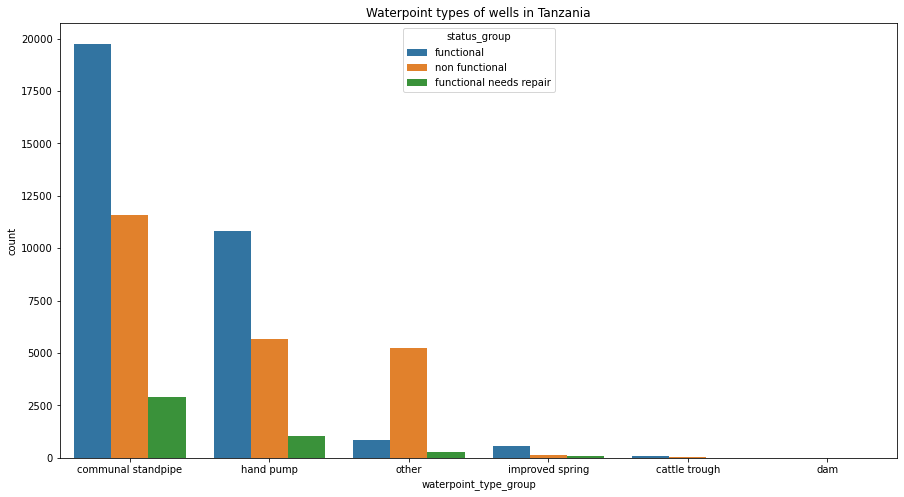

In [152]:
#Get the population around the well
count_plot('waterpoint_type_group')
plt.title('Waterpoint types of wells in Tanzania')

The `communal standpipe` is the most common waterfront well.<br>
In `other` category, there are more `non-functional` wells than `functional` and `functional needs repair` combined being about 5000 non-functional wells.<br>
In the observation, it is seen most wells are `functional`, followed by `non-functional` and then little needing `repair`


Text(0.5, 1.0, 'Extraction type of water at waterpoints in Tanzania')

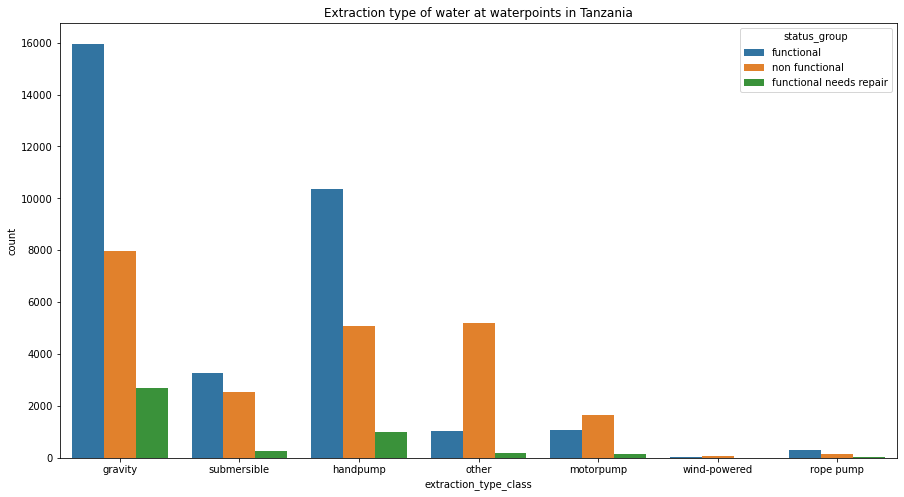

In [153]:
# Plot countplot to show extraction type class
count_plot('extraction_type_class')
plt.title('Extraction type of water at waterpoints in Tanzania')

The extraction type of water that is mostly used is gravity. Since `gravity` is very `cost efficient`, it would make sense that most would prefer gravity to other extraction type.

Text(0.5, 1.0, 'Management groups of waterpoints in Tanzania')

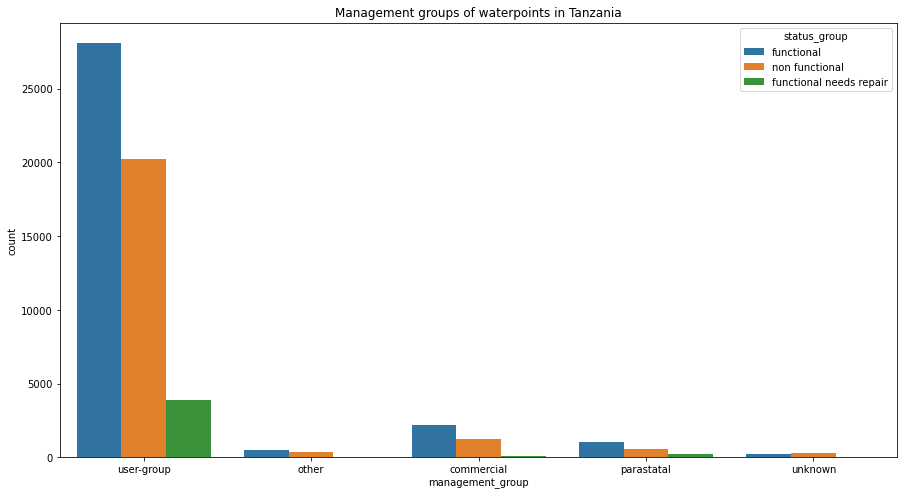

In [154]:
#Plot the countplot to show the management group
count_plot('management_group')
plt.title('Management groups of waterpoints in Tanzania')

Most of the waterwells are managed by `user-groups`

Text(0.5, 1.0, 'Amount of water produced by waterpoints')

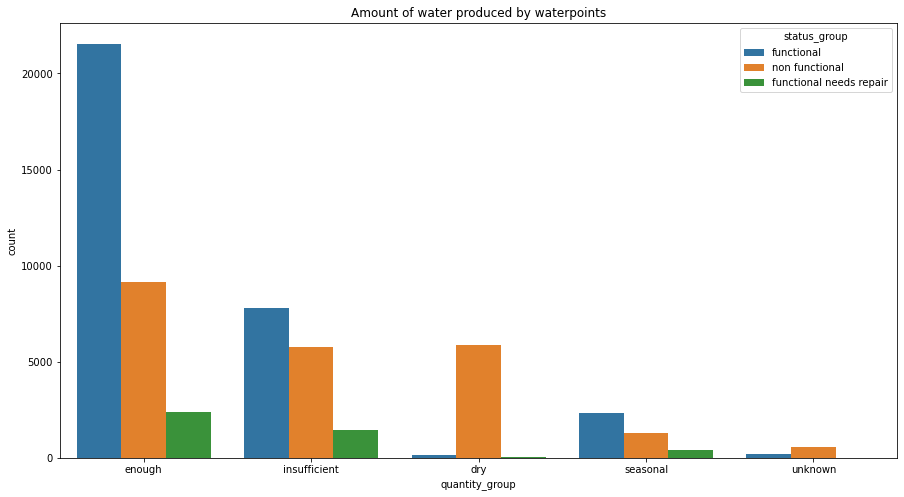

In [155]:
count_plot('quantity_group')
plt.title('Amount of water produced by waterpoints')

The `quantity group` which means the the quantity of water the well produces. It is seen that most wells produce `enough` water.<br>
In `dry` places most wells are `non-functional`

Text(0.5, 1.0, 'Sources of water at waterpoints in Tanzania')

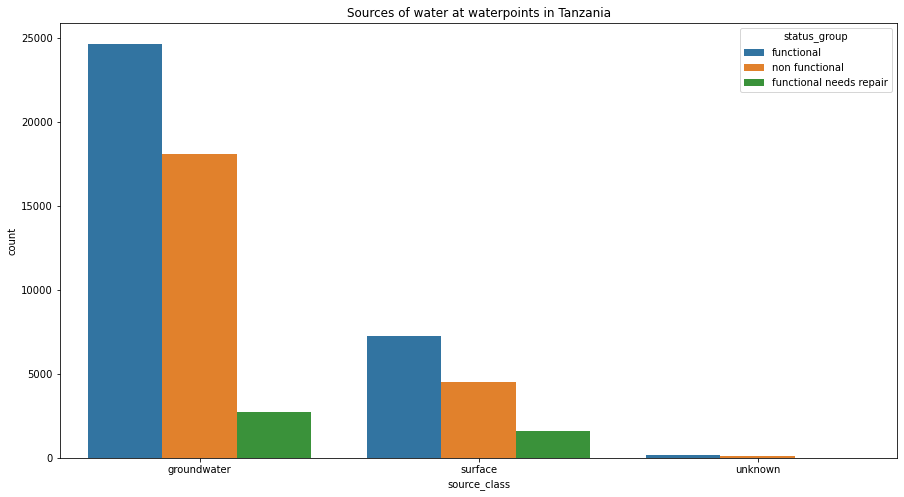

In [156]:
count_plot('source_class')
plt.title('Sources of water at waterpoints in Tanzania')

The source of most water in Tanzania is `groudwater` and most waterpoints are functional.

Text(0.5, 1.0, 'Types of payment made at waterpoints in Tanzania')

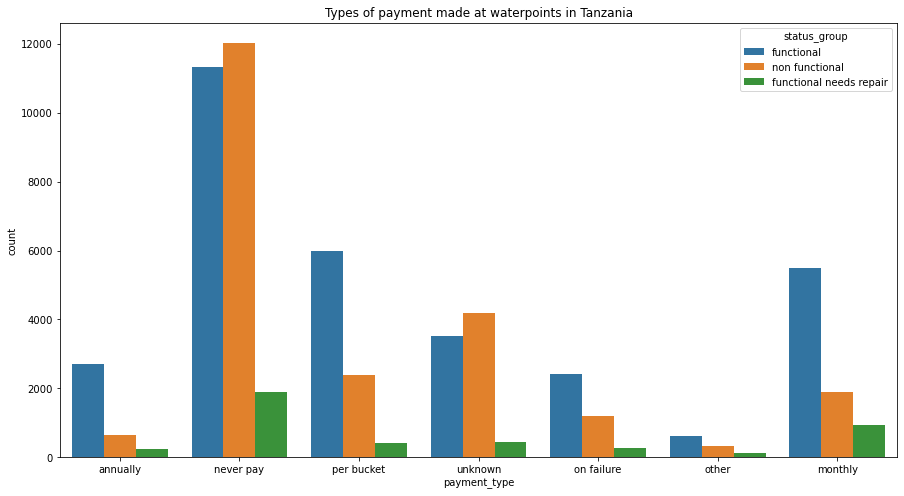

In [157]:
count_plot('payment_type')
plt.title('Types of payment made at waterpoints in Tanzania')

Most of the people in Tanzania do not pay to get water in Tanzania.

Text(0.5, 1.0, 'Types of quality of water at waterpoints in Tanzania')

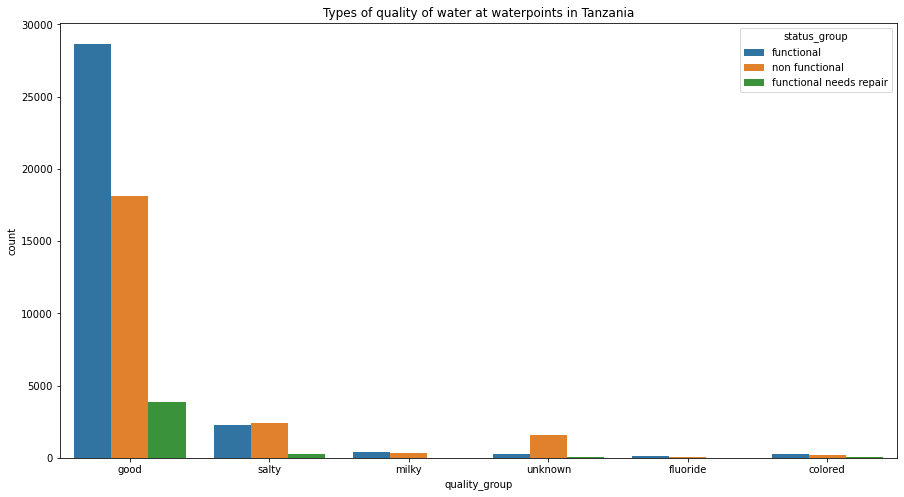

In [158]:
count_plot('quality_group')
plt.title('Types of quality of water at waterpoints in Tanzania')

In `quality group` which is the quality of water, most of the water is of good quality.<br>
In `unknown` quality, most wells are non-functional.<br>
In `salty` water, functional and non-functional waterpoint are almost equally matched.

To get the date pumps were recorded would be too specific and not easy to plot, hence we split the date to years to get the difference between when the year the waterfront was built and the year it was recorded

In [159]:
#change the column to date time
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
# Create a new colmn for years recorded
df['year_recorded'] = df['date_recorded'].apply(lambda x: x.year)
# create a new column for month recorded
df['month_recorded'] = df['date_recorded'].apply(lambda x: x.month)

Text(0.5, 1.0, 'Status of waterpoints ')

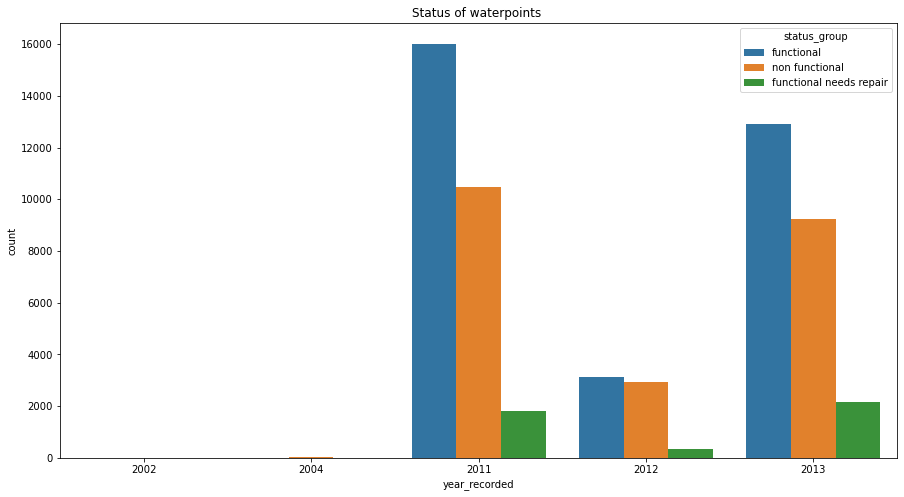

In [160]:
#plot the years the wells were recorded
count_plot('year_recorded')
plt.title('Status of waterpoints ')

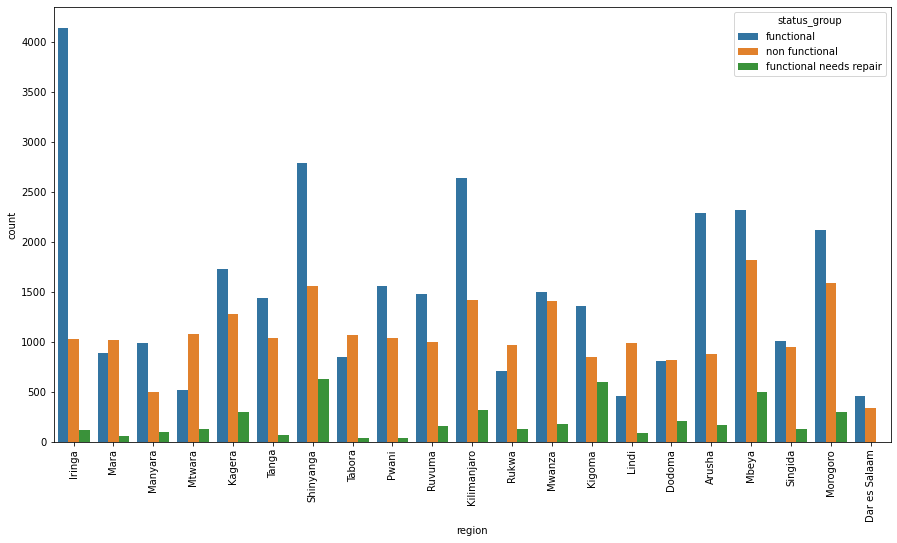

Text(0.5, 1.0, 'Status of waterpoints in regions of Tanzania')

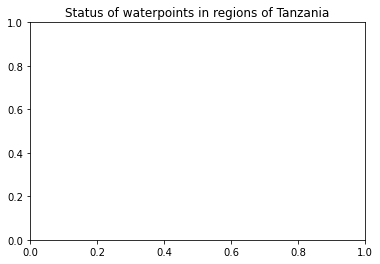

In [161]:
# Plot countplot of water wells in each region
count_plot('region')
plt.xticks(rotation= 90)
plt.show()
plt.title('Status of waterpoints in regions of Tanzania')

Most regions have `functional` water wells.<br>
`Iringa` region has the most `functional` wells.<br>
`Mbeya` region has the most `non-functional` wells.<br>
`shinganya` region has the most `functional need repair` wells

#### Handling numeric data 

Get the summary statistics of the numeric data

In [162]:
# check to see the summary statistics
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,month_recorded
count,59029.000000,59029.000000,59029.000000,59029.000000,5.902900e+04,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000
mean,37126.674956,319.646832,672.299582,34.062263,-5.704219e+00,0.477121,15.383811,5.646614,180.941097,1308.488048,2011.927459,4.383506
std,21455.814250,3006.873793,693.281914,6.585080,2.954644e+00,12.274565,17.606846,9.661485,472.709908,949.095754,0.958969,3.036540
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2002.000000,1.000000
25%,18533.000000,0.000000,0.000000,33.079614,-8.563705e+00,0.000000,5.000000,2.000000,0.000000,0.000000,2011.000000,2.000000
50%,37077.000000,0.000000,377.000000,34.889047,-5.000106e+00,0.000000,12.000000,3.000000,30.000000,1986.000000,2012.000000,3.000000
75%,55671.000000,25.000000,1322.000000,37.189623,-3.323780e+00,0.000000,17.000000,5.000000,220.000000,2004.000000,2013.000000,7.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2013.000000,12.000000


The `average amount tsh` used is `319.6tsh` and max amount is 350000. This means most data are closer to 0 or 0.<br>
The `average population` per well is `180` and max population is 30500 and standard deviation of 472.<br>
Most numeric data have a minimum value of 0 which brings inconsistency in data i.e(`longitude`,`district code`,`construction year` and `population`)

##### Construction year

On summary statistics, we note that the `construction year` has a mean of 1308 and median is 1986, meaning the data has inconsistency

In [163]:
#check the value count for construction year
df['construction_year'].value_counts().head(10)

0       20348
2010     2644
2008     2613
2009     2533
2000     2091
2007     1586
2006     1471
2003     1286
2011     1254
2004     1123
Name: construction_year, dtype: int64

In [164]:
# finding mean and median without zero values by printing out the summary statistics
df.loc[df['construction_year']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,month_recorded
count,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000,38681.000000
mean,37081.392570,466.578125,1002.324836,35.984004,-6.236492,0.707893,15.705644,5.971071,269.717329,1996.813448,2012.170730,3.263230
std,21421.482007,3541.485791,618.152663,2.558622,2.760794,15.085902,21.005654,10.701758,552.376642,12.472149,0.982559,2.404203
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000,2004.000000,1.000000
25%,18489.000000,0.000000,372.000000,34.676995,-8.755833,0.000000,4.000000,2.000000,30.000000,1987.000000,2011.000000,2.000000
50%,37075.000000,0.000000,1154.000000,36.648709,-6.067315,0.000000,11.000000,3.000000,150.000000,2000.000000,2013.000000,3.000000
75%,55514.000000,200.000000,1488.000000,37.804572,-3.652843,0.000000,16.000000,5.000000,304.000000,2008.000000,2013.000000,3.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000,2013.000000,12.000000


In [165]:
#replcaing the zeroes with median of (2000)
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [166]:
#bin the data in categories
df['construction_year_bins'] = pd.cut(x=df['construction_year'], bins=[1959, 1970, 1980, 1990, 2000, 2010, 2020])

Text(0.5, 1.0, 'Status of waterpoints categorised by constuction year of waterpoints in Tanzania')

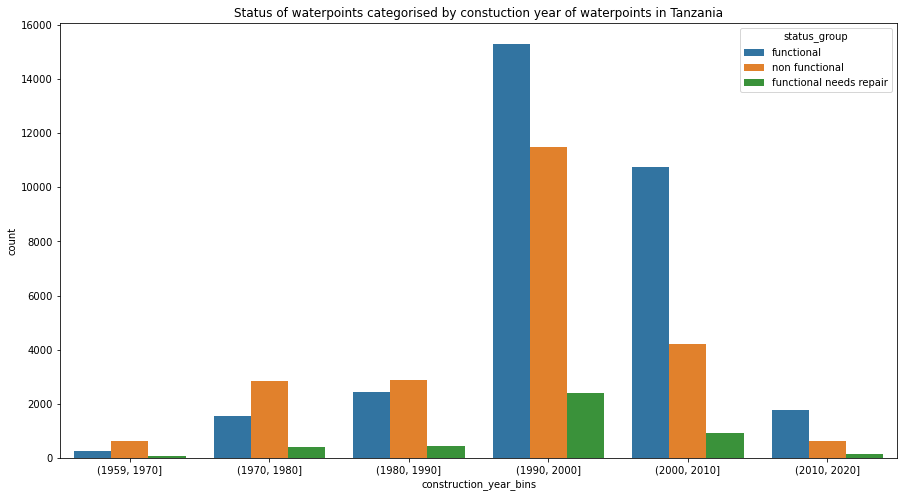

In [167]:
# plot a countplot of year bins
count_plot('construction_year_bins')
plt.title('Status of waterpoints categorised by constuction year of waterpoints in Tanzania')

##### Longitude

The longitude has 0 values while in Tanzania, the 0 longitude does not pass there. There for to handle that mistake, we will replace the 0 with mean of longitudes withput the 0

In [168]:
#Get summary statistics without the 0
df.loc[df['longitude']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,month_recorded
count,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000,57217.000000
mean,37118.340773,329.769699,693.590576,35.140977,-5.884865,0.492231,15.306657,5.746352,186.671304,1997.845763,2011.921247,4.344548
std,21457.298665,3053.569147,693.609346,2.613200,2.818385,12.467116,17.877122,9.789232,479.021568,10.362631,0.961391,3.001204
min,0.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000,2002.000000,1.000000
25%,18536.000000,0.000000,0.000000,33.272816,-8.665395,0.000000,5.000000,2.000000,0.000000,1995.000000,2011.000000,2.000000
50%,37072.000000,0.000000,439.000000,34.988410,-5.130340,0.000000,12.000000,3.000000,39.000000,2000.000000,2012.000000,3.000000
75%,55678.000000,30.000000,1335.000000,37.249506,-3.369736,0.000000,17.000000,5.000000,230.000000,2005.000000,2013.000000,7.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2013.000000,12.000000


In [169]:
#Replace the 0 with the mean
df['longitude'].replace(to_replace = 0, value = 35.14, inplace=True)

##### Population

The population represents the population around the well. The population has 0 in it. This means that either there are no people around certain waterpoints and others might be overcrowded or the data might have been recorded wrongly.

In [170]:
# check the waterpoint with the highest population
df[df['population']== 30500]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,construction_year_bins
30537,12169,0.0,2011-03-12,Government Of Tanzania,184,DWE,38.783756,-5.181904,Mkwajuni,0,Pangani,Mkwajuni,Tanga,4,3,Muheza,Masuguru,30500,True,GeoData Consultants Ltd,VWC,False,2008,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,3,"(2000, 2010]"


At this waterpoint the water quantity is insufficient due to the high population. We will do the same for waterpoints witha a population of 0

In [171]:
zero_pop = df[df['population']== 0]
zero_pop

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,construction_year_bins
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,False,True,2000,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,"(1990, 2000]"
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,2000,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,2012,10,"(1990, 2000]"
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,False,True,2000,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2012,10,"(1990, 2000]"
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,True,2000,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,2012,11,"(1990, 2000]"
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,False,True,2000,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,8,"(1990, 2000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,Lake Victoria,Songambele,Kagera,18,30,Ngara,Nyamiyaga,0,True,GeoData Consultants Ltd,VWC,False,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2011,7,"(1990, 2000]"
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,VWC,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2011,4,"(1990, 2000]"
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,Water authority,False,2000,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional,2012,10,"(1990, 2000]"
59397,37057,0.0,2011-04-11,unknown,0,unknown,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,False,2000,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011,4,"(1990, 2000]"


Text(0.5, 1.0, 'Amount of water at waterpoints with no population')

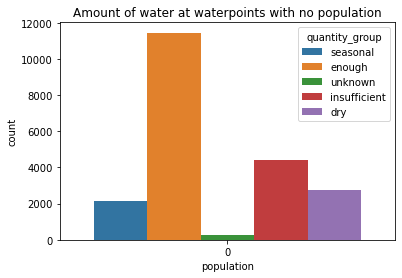

In [172]:
# countplot of areas with a population of 0
sns.countplot(x='population', hue='quantity_group', data =zero_pop)
plt.title('Amount of water at waterpoints with no population')

The data in the chart is quite contradictory. There are no people around yet the water is still insufficient. It is better to say it is an error in inputing data and replace the 0 with the mean

In [173]:
# find the mean of population without the 0 
df.loc[df['population']!= 0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year_recorded,month_recorded
count,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000,38009.000000
mean,37105.920835,447.905492,969.837407,36.075166,-6.140896,0.740982,16.076219,6.300850,281.006393,1996.907048,2012.181247,3.276329
std,21407.372101,3707.251448,612.616764,2.586672,2.737229,15.290304,21.600785,11.304494,564.725261,12.425480,0.982139,2.424826
min,1.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,1.000000,1960.000000,2004.000000,1.000000
25%,18514.000000,0.000000,347.000000,34.715839,-8.389661,0.000000,4.000000,2.000000,40.000000,1988.000000,2011.000000,2.000000
50%,37126.000000,0.000000,1134.000000,36.707655,-5.752525,0.000000,10.000000,3.000000,150.000000,2000.000000,2013.000000,3.000000
75%,55505.000000,100.000000,1465.000000,37.940962,-3.598843,0.000000,16.000000,5.000000,323.000000,2008.000000,2013.000000,3.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,67.000000,30500.000000,2013.000000,2013.000000,12.000000


In [174]:
#Replace the 0 with the mean
df['population'].replace(to_replace = 0, value = 281, inplace=True)

#### Dropping columns 

After analysing, we will drop the columns that we will not use to predict our target which is the status of waterpoint. <br>
We drop the repeated columns first. In the repeated columns, we would like to have as much detail as possible to predict the status of a waterpoint. Therefore we drop the columns with lesser detail.

In [175]:
#drop the columns that have repeated data
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group','payment_type','extraction_type_class','extraction_type','waterpoint_type_group','district_code','region_code','funder'], inplace=True)

In [176]:
# write a function to drop coolumns
def dropping(col):
    df.drop(col, axis=1, inplace=True)
    return df

We drop the columns that will not help the model predict the status group. Drop columns that have only one value in the column 

In [177]:
#drop the recorded by column
dropping('recorded_by')

,id,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded,month_recorded,construction_year_bins
0,69572,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,2011,3,"(1990, 2000]"
1,8776,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,Serengeti,Natta,280,False,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2013,3,"(2000, 2010]"
2,34310,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,2013,2,"(2000, 2010]"
3,67743,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,2013,1,"(1980, 1990]"
4,19728,0.0,2011-07-13,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,281,True,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2011,7,"(1990, 2000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,2013,5,"(1990, 2000]"
59396,27263,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,56,True,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional,2011,5,"(1990, 2000]"
59397,37057,0.0,2011-04-11,0,unknown,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,281,True,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,2011,4,"(1990, 2000]"
59398,31282,0.0,2011-03-08,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,281,True,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,2011,3,"(1990, 2000]"


In [178]:
# check the number of unique rows in subvillage column
df['subvillage'].nunique()

19287

We drop `subvillage` because it has too many subcategories

In [179]:
#drop the column subvillage
dropping('subvillage')

,id,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,region,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded,month_recorded,construction_year_bins
0,69572,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,2011,3,"(1990, 2000]"
1,8776,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,Serengeti,Natta,280,False,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2013,3,"(2000, 2010]"
2,34310,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,2013,2,"(2000, 2010]"
3,67743,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,2013,1,"(1980, 1990]"
4,19728,0.0,2011-07-13,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,Karagwe,Nyakasimbi,281,True,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2011,7,"(1990, 2000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,2013,5,"(1990, 2000]"
59396,27263,4700.0,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Iringa,Njombe,Ikondo,56,True,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional,2011,5,"(1990, 2000]"
59397,37057,0.0,2011-04-11,0,unknown,34.017087,-8.750434,Mashine,0,Rufiji,Mbeya,Mbarali,Chimala,281,True,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,2011,4,"(1990, 2000]"
59398,31282,0.0,2011-03-08,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Dodoma,Chamwino,Mvumi Makulu,281,True,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,2011,3,"(1990, 2000]"


We drop the `amount_tsh` because most values are zero and it will not help predict the model.

In [180]:
#drop the column amount_tsh
dropping('amount_tsh')

,id,date_recorded,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,region,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded,month_recorded,construction_year_bins
0,69572,2011-03-14,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,2011,3,"(1990, 2000]"
1,8776,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,Serengeti,Natta,280,False,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,2013,3,"(2000, 2010]"
2,34310,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,2013,2,"(2000, 2010]"
3,67743,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,2013,1,"(1980, 1990]"
4,19728,2011-07-13,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,Karagwe,Nyakasimbi,281,True,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2011,7,"(1990, 2000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,2013-05-03,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,2013,5,"(1990, 2000]"
59396,27263,2011-05-07,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Iringa,Njombe,Ikondo,56,True,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional,2011,5,"(1990, 2000]"
59397,37057,2011-04-11,0,unknown,34.017087,-8.750434,Mashine,0,Rufiji,Mbeya,Mbarali,Chimala,281,True,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,2011,4,"(1990, 2000]"
59398,31282,2011-03-08,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Dodoma,Chamwino,Mvumi Makulu,281,True,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,2011,3,"(1990, 2000]"


On locational data, we can drop columns that repeat themselves. Too much of locational data can lead to overfitting.<br>
We drop all the columns that will not help predict the model. The construction year and date recorded have proven to be out of date due to their in convinience.

In [181]:
#drop the lga and ward colums
df.drop(['lga','ward','date_recorded','id','wpt_name','num_private',
         'construction_year','year_recorded','month_recorded'], axis=1, inplace=True)